In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Reading the meta data
# importing libraries
import gzip
import shutil
import pandas as pd
import numpy as np

In [3]:
#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1='/content/drive/My Drive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json.gz'

In [4]:
# Path to meta data .json file
path2 = '/content/drive/My Drive/sentiment_analysis/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [5]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [6]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [7]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [8]:
df_meta.head(1)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164


In [9]:
#converting the null entries within the dataframe to nan 
def clnr(df_meta):
  for col in df_meta.columns:
    if type(df_meta[col][0]) == list or type(df_meta[col][0]) == dict:
      df_meta[col] = df_meta[col].apply(lambda y: np.nan if len(y)==0 else y)
    elif type(df_meta[col][0]) == str:
      df_meta[col] = df_meta[col].apply(lambda y: np.nan if y=="" else y)
  return df_meta

df_meta = clnr(df_meta)

In [10]:
#find number of duplicate Asin
df_meta['asin'].duplicated().sum()

715

In [11]:
# drop rows with duplicate asin
df_meta = df_meta[~df_meta["asin"].duplicated()]

In [12]:
#dropping columns in meta_df that are deemed unnecessary for our analysis
df_meta.drop(['description','fit','image'],axis=1,inplace=True)

In [13]:
r,c = df_meta.shape
print(r,c)

589356 15


In [14]:
#percentage of missing values in each column
sr = (df_meta.isna().sum()/r)*100
sr

category         9.414513
tech1           98.884715
title            0.001527
also_buy        92.498252
tech2           99.960805
brand            2.152349
feature         33.712731
rank             0.000000
also_view       91.782556
details         97.983731
main_cat         0.574525
similar_item    91.365830
date            92.230842
price           78.373513
asin             0.000000
dtype: float64

In [15]:
# columns with more than 35% missing data
sr = sr[sr>35]
print("Columns are : ",list(sr.index))

Columns are :  ['tech1', 'also_buy', 'tech2', 'also_view', 'details', 'similar_item', 'date', 'price']


In [16]:
# drop those columns
df_meta.drop(list(sr.index),axis=1,inplace=True)
df_meta.head(1)

,category,title,brand,feature,rank,main_cat,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",Trollies Sing a Long Party VHS,NaN,NaN,"557,379 in Movies & TV (",Movies & TV,6303195164


In [17]:
#percentage of missing values in each column
sr = (df_meta.isna().sum()/r)*100
sr

category     9.414513
title        0.001527
brand        2.152349
feature     33.712731
rank         0.000000
main_cat     0.574525
asin         0.000000
dtype: float64

In [18]:
#dropping rank column as the data in this column is very unstructured
df_meta.drop(['rank'],axis=1,inplace=True)

In [19]:
df_meta.dropna(inplace=True)

In [20]:
# find only cell phones from category column
df_meta['category'] = df_meta['category'].apply(lambda y: y if y[1] =="Cell Phones" else np.nan)

In [21]:
df_meta.dropna(inplace=True)
df_meta.shape

(8378, 6)

In [22]:
#percentage of missing values in each column, #verify missing values.
sr = (df_meta.isna().sum()/r)*100
sr

category    0.0
title       0.0
brand       0.0
feature     0.0
main_cat    0.0
asin        0.0
dtype: float64

In [23]:
df_meta.shape

(8378, 6)

In [25]:
#importing the file
df=pd.read_csv('/content/drive/My Drive/sentiment_analysis/Cell_Phones_and_Accessories_5.csv')
df.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE


In [26]:
#dropping columns that are not necessary for the analysis from cellphone df
df.drop(['reviewerID','reviewerName','image'],axis=1,inplace=True)

In [27]:
# rows and columns
r,c = df.shape
print(r,c)

1128437 9


In [28]:
#percentage of missing values in each column
sr = (df.isna().sum()/r)*100
sr

overall              0.000000
verified             0.000000
asin                 0.000000
style               46.364662
reviewText           0.068059
summary              0.046525
unixReviewTime       0.000000
vote                91.844117
review_sentiment     0.000000
dtype: float64

In [29]:
#dropping style and vote column since they have more than 40% missing values
df.drop(['style','vote'],axis=1,inplace=True)

In [30]:
# adding review text and summary to make a new column
df['review']=df['reviewText']+df['summary']

In [31]:
# mearging two dataframe based on asin
df2=pd.merge(left=df,right=df_meta,left_on='asin',right_on='asin')

In [32]:
# rows and columns
r,c = df2.shape
print(r,c)

62642 13


In [33]:
#percentage of missing values in each column
sr = (df2.isna().sum()/r)*100
sr

overall             0.000000
verified            0.000000
asin                0.000000
reviewText          0.051084
summary             0.027138
unixReviewTime      0.000000
review_sentiment    0.000000
review              0.076626
category            0.000000
title               0.000000
brand               0.000000
feature             0.000000
main_cat            0.000000
dtype: float64

In [34]:
# drop the reviewtext and summary column and image columns
df2.drop(['reviewText','summary'],axis=1,inplace=True)

In [35]:
# Converting unix review time to date-time format
#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df2['Date&Time'] = df2['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [36]:
df2.drop(['unixReviewTime'],axis=1,inplace=True)

In [37]:
# Top 10 brands in Cell Phones category are
print(df2.brand.value_counts()[:10])

Samsung       15975
BLU            9330
LG             6644
Nokia          4795
Motorola       4501
Apple          4053
BlackBerry     3640
HTC            2454
Sony           1547
Huawei         1364
Name: brand, dtype: int64


In [38]:
# total no of positive and negative comments
df2.review_sentiment.value_counts()

POSITIVE    46704
NEGATIVE    15938
Name: review_sentiment, dtype: int64

In [39]:
# total overall ranking
df2.overall.value_counts()

5.0    39690
4.0     9747
1.0     5549
3.0     4772
2.0     2884
Name: overall, dtype: int64

In [40]:
df2.head(1)

,overall,verified,asin,review_sentiment,review,category,title,brand,feature,main_cat,Date&Time
0,1.0,False,B0000SX3BK,POSITIVE,I had been very happy with my Motorola phone u...,"[Cell Phones & Accessories, Cell Phones, Unloc...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",Cell Phones & Accessories,2005-12-20


In [41]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [42]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

In [44]:
# 1.2 Apply preprocess function to the dataframe
df2['review'] = df2['review'].astype("str")
df2["clean_text"] = df2['review'].apply(clean_text)

In [45]:
# top ten words in review used
pd.Series(' '.join(df2['review']).lower().split()).value_counts()[:10]

the      258009
i        138798
and      138361
a        133532
to       123902
is        99936
it        95835
phone     88198
this      68393
for       67396
dtype: int64

In [ ]:
# top ten words in clean review used
pd.Series(' '.join(df2['clean_text']).lower().split()).value_counts()[:10]

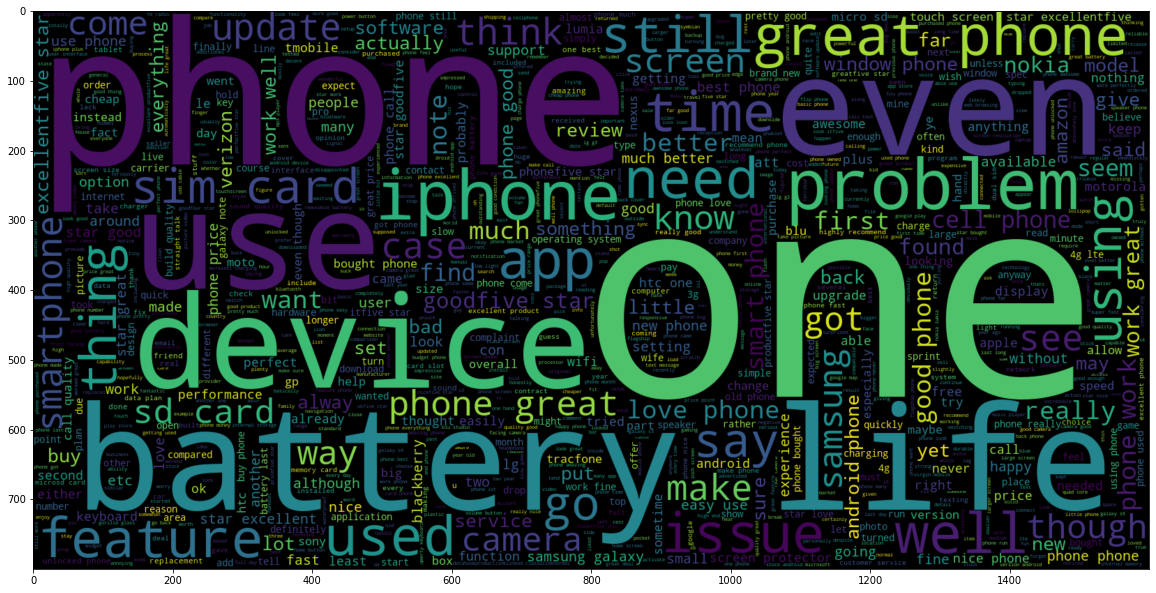

In [46]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df2[df2['review_sentiment'] == 'POSITIVE']['clean_text']))
plt.imshow(wc, interpolation = 'bilinear');

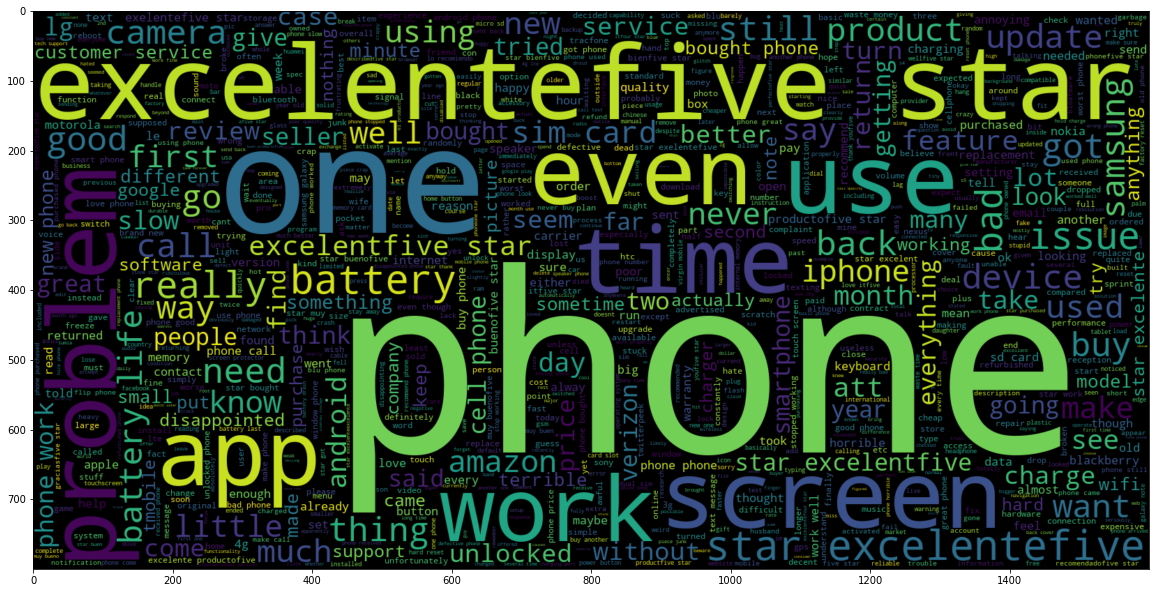

In [47]:
# plot the word cloud for text with negative sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df2[df2['review_sentiment'] == 'NEGATIVE']['clean_text']))
plt.imshow(wc, interpolation = 'bilinear');

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(df2['clean_text'])
print(X_counts.shape)
print(count_vect.get_feature_names()[:20])

(62642, 41)
['\x07', '\x1b', ' ', "'", '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
# Apply CountVectorizer to smaller sample
data_sample = df[0:200]
count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(df2['clean_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names()[:20])

(62642, 41)
['\x07', '\x1b', ' ', "'", '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
# Vectorizing Raw Data: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
y=df['review_sentiment']
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df2['clean_text'])

In [52]:
# Make training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['clean_text'], y, test_size=0.30, )
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)                  
count_test = count_vectorizer.transform(X_test)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)   
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

ValueError: ignored

In [ ]:
#Naive Bayes classifier for Multinomial model 
#--------------------------------------------------------------
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                    
pred = clf.predict(tfidf_test)                   
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])

print(cm)

clf = MultinomialNB()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Positive', 'Negative'])

print(cm)